# Подключение библиотек

In [1]:
# Джентльменский набор
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Предобработки
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ошибки для оценки
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Загрузка данных

In [6]:
df = pd.read_csv('match_data_v5.csv')

In [7]:
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,EUW1_6882489515',2,23,4,2,0,0,0,7,0,...,2,0,1,400,94,29637,32613,27239,1,0
1,EUW1_6882416210',2,46,12,1,0,1,0,10,0,...,1,0,4,373,76,28970,30320,36585,0,0
2,EUW1_6881092720',2,19,13,0,0,0,0,11,0,...,2,0,3,340,84,30510,29464,42984,0,0
3,EUW1_6879405717',3,28,8,0,1,1,0,9,1,...,0,0,5,378,87,25157,31069,28229,0,0
4,EUW1_6879389461',3,30,11,1,1,1,0,7,0,...,1,0,5,382,96,26052,29475,19245,1,0


In [8]:
# добавляем названия колонок
df.columns =["matchID","blueTeamControlWardsPlaced","blueTeamWardsPlaced","blueTeamTotalKills","blueTeamDragonKills","blueTeamHeraldKills","blueTeamTowersDestroyed","blueTeamInhibitorsDestroyed","blueTeamTurretPlatesDestroyed","blueTeamFirstBlood","blueTeamMinionsKilled","blueTeamJungleMinions","blueTeamTotalGold","blueTeamXp","blueTeamTotalDamageToChamps","redTeamControlWardsPlaced","redTeamWardsPlaced","redTeamTotalKills","redTeamDragonKills","redTeamHeraldKills","redTeamTowersDestroyed","redTeamInhibitorsDestroyed","redTeamTurretPlatesDestroyed","redTeamMinionsKilled","redTeamJungleMinions","redTeamTotalGold","redTeamXp","redTeamTotalDamageToChamps","blueWin","empty"]
# удаляем данные об id матча, так как он не влияет на предсказание, а так же последнюю колонку, так как она не несет никакой информации
df = df.drop(columns=['matchID', 'empty'])
df.head()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
0,2,23,4,2,0,0,0,7,0,388,...,0,2,0,1,400,94,29637,32613,27239,1
1,2,46,12,1,0,1,0,10,0,348,...,0,1,0,4,373,76,28970,30320,36585,0
2,2,19,13,0,0,0,0,11,0,331,...,0,2,0,3,340,84,30510,29464,42984,0
3,3,28,8,0,1,1,0,9,1,355,...,0,0,0,5,378,87,25157,31069,28229,0
4,3,30,11,1,1,1,0,7,0,370,...,0,1,0,5,382,96,26052,29475,19245,1


# Обзор данных

In [9]:
# проверяем данные на пропуски
df.isna().sum()

blueTeamControlWardsPlaced       0
blueTeamWardsPlaced              0
blueTeamTotalKills               0
blueTeamDragonKills              0
blueTeamHeraldKills              0
blueTeamTowersDestroyed          0
blueTeamInhibitorsDestroyed      0
blueTeamTurretPlatesDestroyed    0
blueTeamFirstBlood               0
blueTeamMinionsKilled            0
blueTeamJungleMinions            0
blueTeamTotalGold                0
blueTeamXp                       0
blueTeamTotalDamageToChamps      0
redTeamControlWardsPlaced        0
redTeamWardsPlaced               0
redTeamTotalKills                0
redTeamDragonKills               0
redTeamHeraldKills               0
redTeamTowersDestroyed           0
redTeamInhibitorsDestroyed       0
redTeamTurretPlatesDestroyed     0
redTeamMinionsKilled             0
redTeamJungleMinions             0
redTeamTotalGold                 0
redTeamXp                        0
redTeamTotalDamageToChamps       0
blueWin                          0
dtype: int64

In [10]:
# Посмотрим на структуру данных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
blueTeamControlWardsPlaced,24225.0,3.610815,2.018622,0.0,2.0,3.0,5.0,37.0
blueTeamWardsPlaced,24225.0,41.362023,43.471913,9.0,25.0,29.0,35.0,603.0
blueTeamTotalKills,24225.0,12.792487,4.910510,0.0,9.0,12.0,16.0,38.0
blueTeamDragonKills,24225.0,0.737833,0.722126,0.0,0.0,1.0,1.0,2.0
blueTeamHeraldKills,24225.0,0.123591,0.329247,0.0,0.0,0.0,0.0,2.0
blueTeamTowersDestroyed,24225.0,0.654902,0.885749,0.0,0.0,0.0,1.0,10.0
blueTeamInhibitorsDestroyed,24225.0,0.002023,0.054101,0.0,0.0,0.0,0.0,2.0
blueTeamTurretPlatesDestroyed,24225.0,8.915789,3.083976,0.0,7.0,9.0,11.0,22.0
blueTeamFirstBlood,24225.0,0.503860,0.499995,0.0,0.0,1.0,1.0,1.0
blueTeamMinionsKilled,24225.0,349.240578,31.339593,194.0,329.0,350.0,371.0,465.0


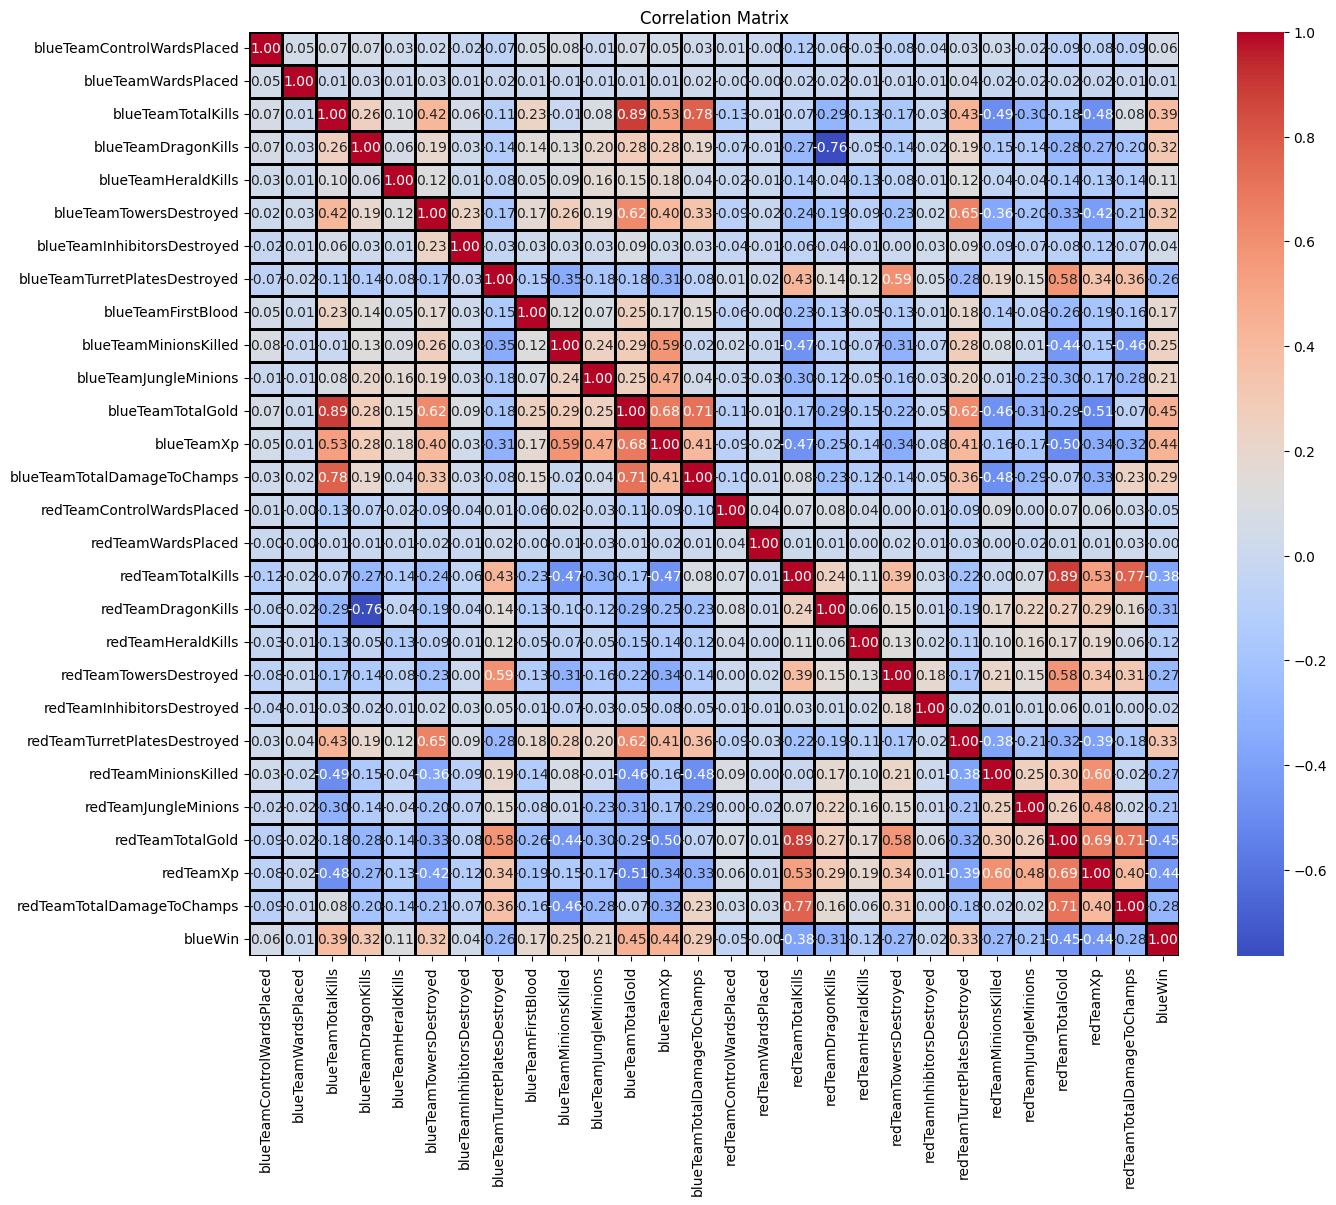

In [11]:
# посмотрим на корреляцию данных
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [70]:
# Делим данные на features и target
X = df.drop(columns=['blueWin'], axis=1)
y = df['blueWin']

# Model №1: Логистическая регрессия

In [21]:
# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [29]:
# Создаем модель и делаем предположение
model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)

In [30]:
accuracy_score(pred, y_test)

0.7578425976884975

# Model №2: Дерево решений

In [103]:
# Изменим датасет, объединим некоторые признаки в один, чтобы уменьшить количество признаков
df2 = pd.DataFrame()

df2['diffTotalKills'] = (df['blueTeamTotalKills'] - df['redTeamTotalKills'])
df2['diffDragonKills'] = (df['blueTeamDragonKills'] - df['redTeamDragonKills'])
df2['diffHeraldKills']= (df['blueTeamHeraldKills'] - df['redTeamHeraldKills'])
df2['diffTowersDestroyed']= (df['blueTeamTowersDestroyed'] - df['redTeamTowersDestroyed'])
df2['diffInhibitorsDestroyed']= (df['blueTeamInhibitorsDestroyed'] - df['redTeamInhibitorsDestroyed'])
df2['diffTurretPlatesDestroyed']= (df['blueTeamTurretPlatesDestroyed'] - df['redTeamTurretPlatesDestroyed'])
df2['diffMinionsKilled'] = (df['blueTeamMinionsKilled'] - df['redTeamMinionsKilled'])
df2['diffJungleMinions'] = (df['blueTeamJungleMinions'] - df['redTeamJungleMinions'])
df2['diffTotalGold'] = (df['blueTeamTotalGold'] - df['redTeamTotalGold'])
df2['diffXp'] = (df['blueTeamXp'] - df['redTeamXp'])
df2['diffTotalDamageToChamps'] = (df['blueTeamTotalDamageToChamps'] - df['redTeamTotalDamageToChamps'])
df2['blueTeamControlWardsPlaced'] = df['blueTeamControlWardsPlaced']
df2['redTeamControlWardsPlaced'] = df['redTeamControlWardsPlaced']
df2['blueTeamWardsPlaced'] = df['blueTeamWardsPlaced']
df2['redTeamWardsPlaced'] = df['redTeamWardsPlaced']
df2['blueTeamFirstBlood'] = df['blueTeamFirstBlood']
df2['blueWin'] = df['blueWin']

In [104]:
df2

,diffTotalKills,diffDragonKills,diffHeraldKills,diffTowersDestroyed,diffInhibitorsDestroyed,diffTurretPlatesDestroyed,diffMinionsKilled,diffJungleMinions,diffTotalGold,diffXp,diffTotalDamageToChamps,blueTeamControlWardsPlaced,redTeamControlWardsPlaced,blueTeamWardsPlaced,redTeamWardsPlaced,blueTeamFirstBlood,blueWin
0,-12,2,0,-2,0,6,-12,12,-5714,-2815,-5397,2,6,23,34,0,1
1,-5,1,0,0,0,6,-25,22,-1118,210,-768,2,6,46,26,0,0
2,-5,-1,0,-2,0,8,-9,12,-2384,37,-4945,2,3,19,241,0,0
3,-2,-1,1,1,0,4,-23,-3,2176,-603,3109,3,0,28,23,1,0
4,4,0,1,0,0,2,-12,4,1720,1591,7431,3,7,30,26,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24220,-9,0,0,0,0,5,-88,4,-5764,-6537,-3442,0,6,27,37,0,0
24221,-4,-1,0,-1,0,2,-42,16,-1831,-2146,-6230,4,2,29,25,0,0
24222,-2,0,1,0,0,7,-42,13,-2663,-1020,-5752,1,5,25,31,0,0
24223,-8,-2,0,-1,0,7,23,-14,-4526,-1811,-8954,4,1,27,40,0,0


In [105]:
X = df2.drop(columns=['blueWin'], axis=1)
y = df2['blueWin']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [107]:
clf = DecisionTreeClassifier(max_depth=5, random_state=11)
clf = clf.fit(X_train, y_train)

In [108]:
pred = clf.predict(X_test)

In [109]:
accuracy_score(pred, y_test)

0.7545404512933407

# Model №3: Градиентный бустинг

In [110]:
X = df.drop(columns=['blueWin'], axis=1)
y = df['blueWin']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [112]:
xgbc = XGBClassifier(seed=11, learning_rate=0.05, max_depth=6, n_estimators=75)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
pred = xgbc.predict(X_test)

In [114]:
accuracy_score(pred, y_test)

0.759493670886076